In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from pathlib import Path
import os
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
import re
from textblob import TextBlob


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/veochae/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /Users/veochae/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [2]:
print(Path.cwd())
os.chdir('../data/cleaned data')

/Users/veochae/Desktop/Dreams/data visualization


In [5]:
df = pd.read_csv("complete.csv", index_col= 0)

In [27]:
sentiment_dict = {"sentiment":[], "subjectivity":[]}
tag_dict = {"word" :[], "tag":[]}
full = []

for i in df['complete']:
    ans = TextBlob(i)
    full.append(ans.tags)
    sentiment_dict['sentiment'].append(ans.sentiment[0])
    sentiment_dict['subjectivity'].append(ans.sentiment[1])

for i in full:
    for j in i:
        tag_dict['word'].append(j[0])
        tag_dict['tag'].append(j[1])

# #tag list can be found in : https://www.guru99.com/pos-tagging-chunking-nltk.html

In [28]:
tag_df  = pd.DataFrame(tag_dict)
sentiment_df = pd.DataFrame(sentiment_dict)

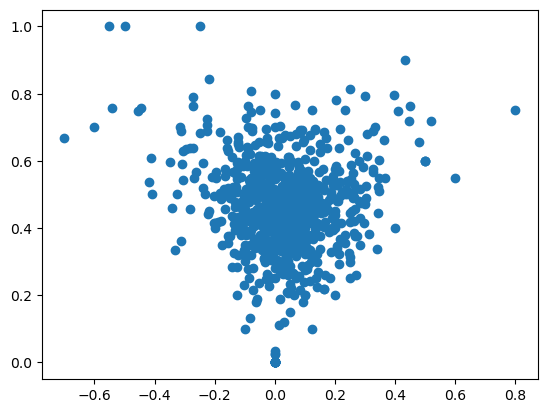

In [34]:
plt.scatter(sentiment_df['sentiment'],sentiment_df['subjectivity'])

In [3]:
tag_desc = pd.read_csv("../nltk_tag_description.csv", index_col= None).to_dict("list")

In [15]:
def barplot(x, z="", l = False):
    t = np.unique(x, return_counts = True)
    s = np.argsort(t[1])

    if l == True:
        x = t[0][s][-z:]
        y = t[1][s][-z:]
    else:   
        x = t[0][s]
        y = t[1][s]

    fig = plt.figure(figsize=(8,8)) #INITIALIZE FIGURE 
    ax = fig.add_subplot()

    ax.bar(x,y)

    ax.set_title(f"Barplot", fontsize = 20)
    ax.set_xlabel(f"", fontsize = 15)
    ax.set_ylabel("Count", fontsize = 15)
    plt.xticks(rotation=90)

    ax.legend()

    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


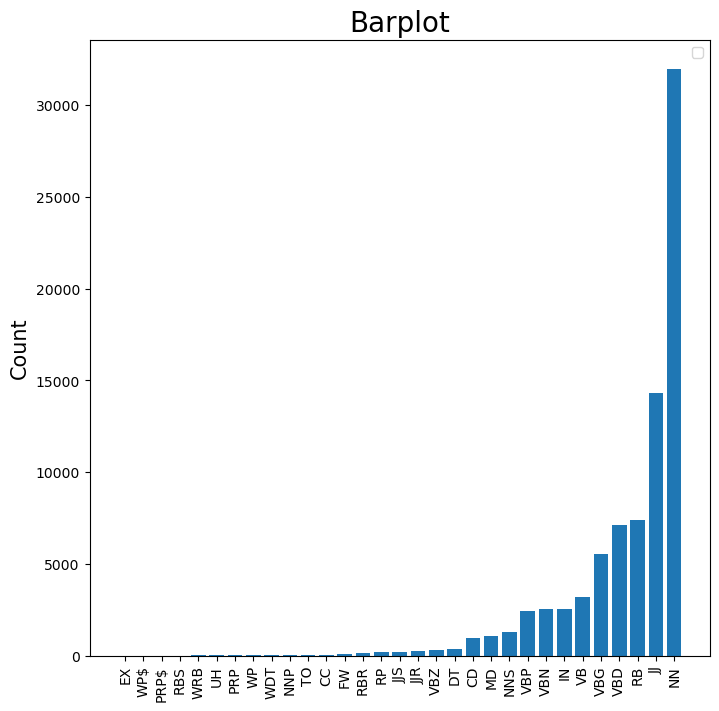

In [16]:
barplot(tag_df['tag'])

In [18]:
def wordcloud(x, lim):
    text = " ".join(x)
    cloud = WordCloud(collocations = False, max_words = lim).generate(text)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

CC ['Coordinating conjunction']


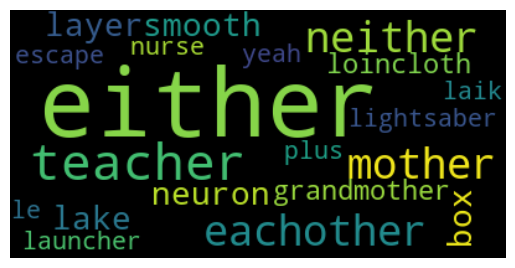

CD ['Cardinal number']


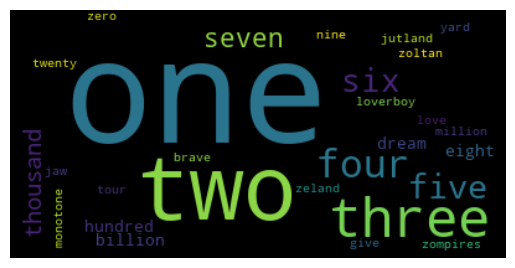

DT ['Determiner']


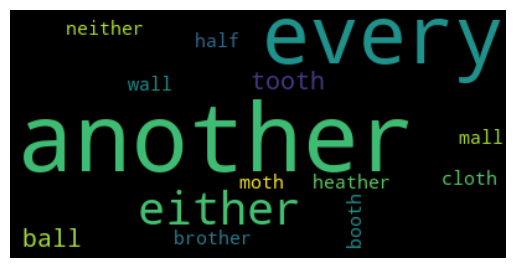

EX ['Existential\xa0there']
Word Cloud ValueError 

FW ['Foreign word']


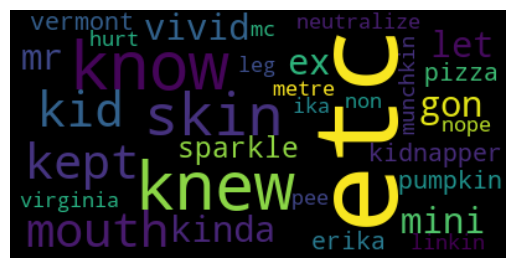

IN ['Preposition or subordinating conjunction']


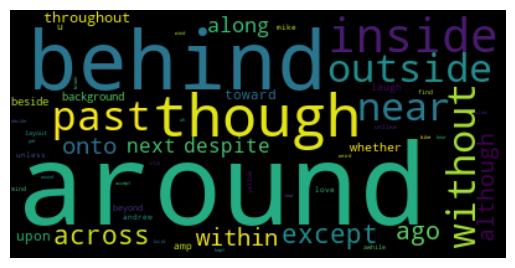

JJ ['Adjective']


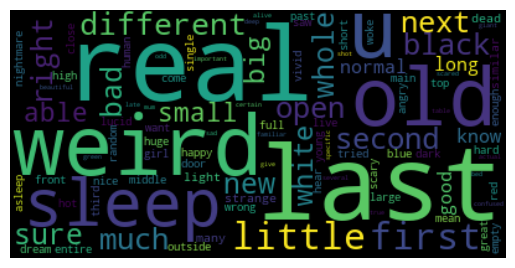

JJR ['Adjective, comparative']


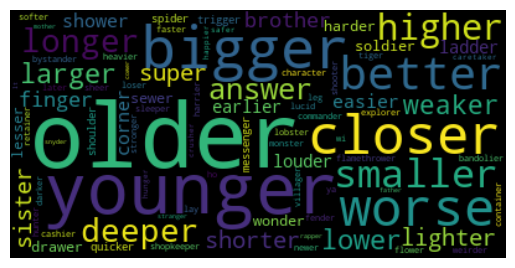

JJS ['Adjective, superlative']


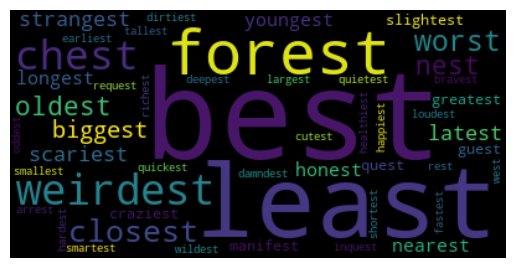

MD ['Modal']


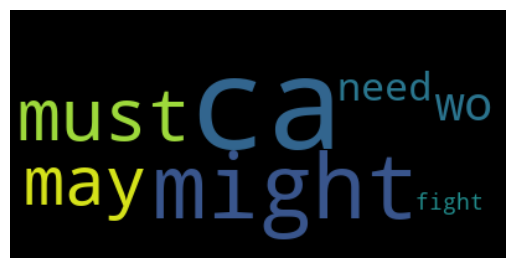

NN ['Noun, singular or mass']


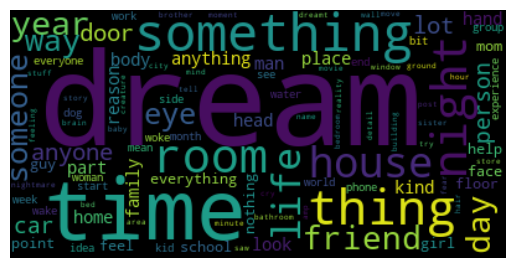

NNP ['Proper noun, singular']


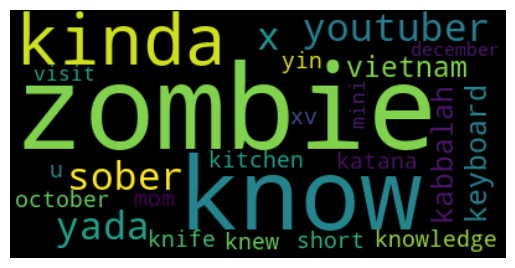

NNS ['Noun, plural']


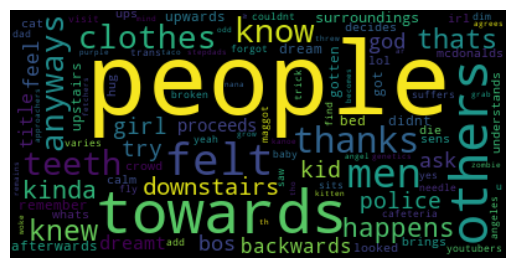

PRP ['Personal pronoun']


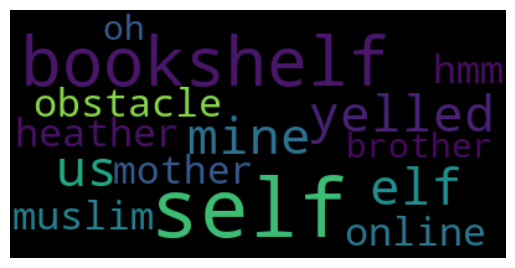

PRP$ ['Possessive pronoun']


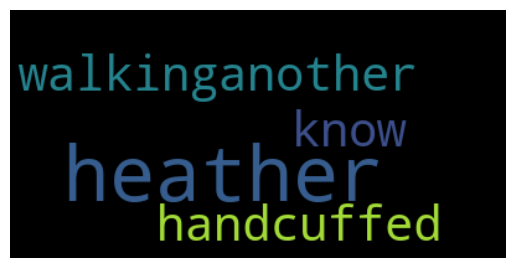

RB ['Adverb']


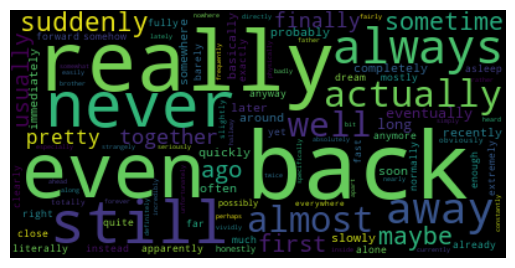

RBR ['Adverb, comparative']


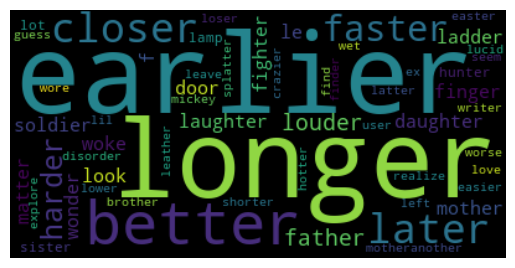

RBS ['Adverb, superlative']


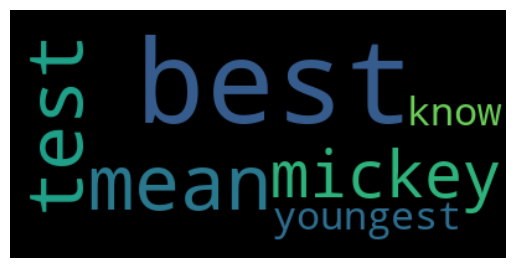

RP ['Particle']


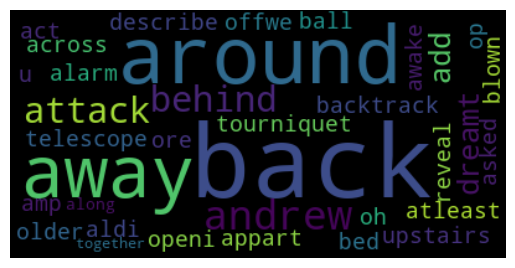

TO ['to']


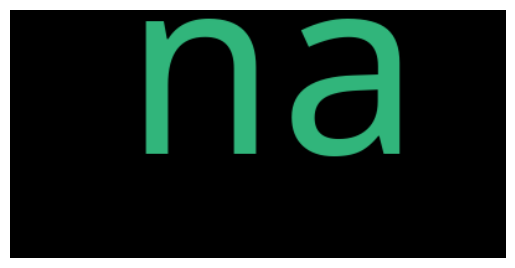

UH ['Interjection']


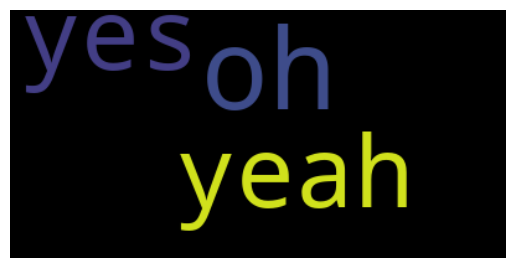

VB ['Verb, base form']


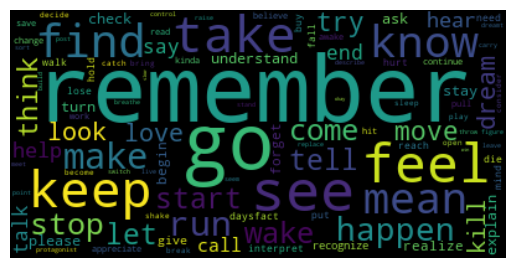

VBD ['Verb, past tense']


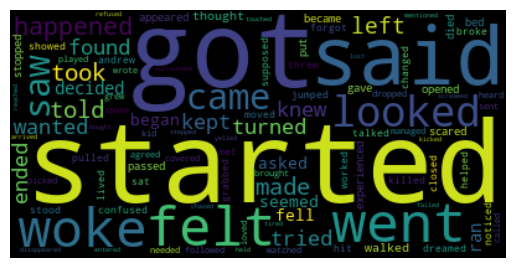

VBG ['Verb, gerund or present participle']


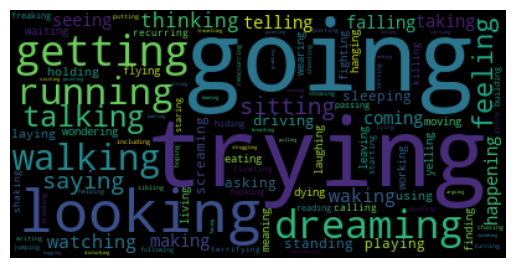

VBN ['Verb, past participle']


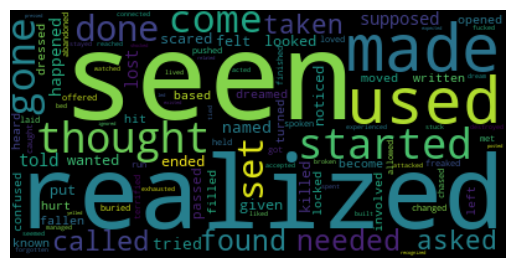

VBP ['Verb, non-3rd person singular present']


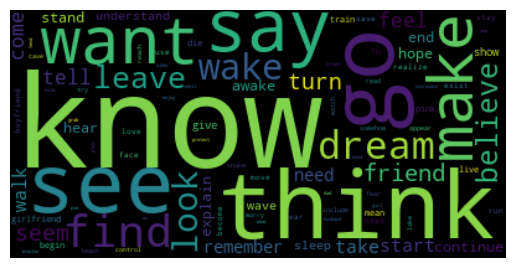

VBZ ['Verb, 3rd person singular present']


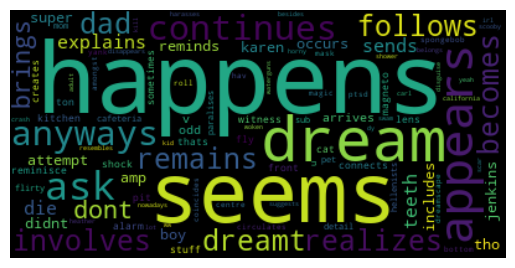

WDT ['Wh-determiner']


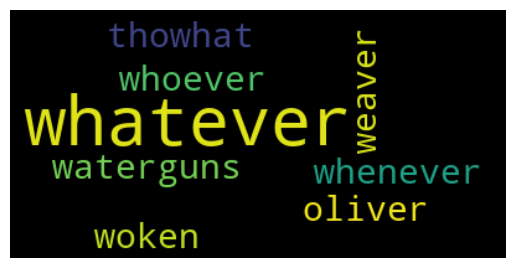

WP ['Wh-pronoun']


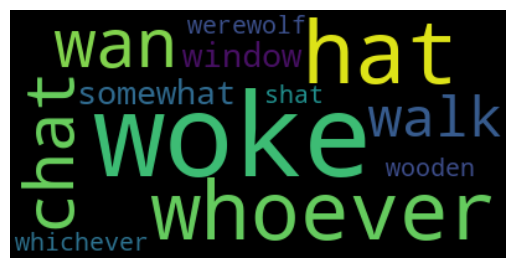

WP$ ['Possessive wh-pronoun']


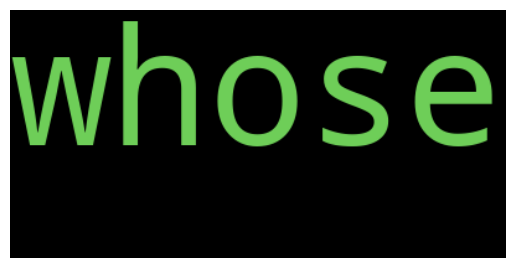

WRB ['Wh-adverb']


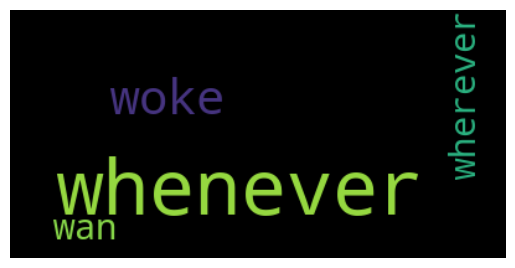

In [19]:
for i in np.unique(tag_df['tag']):
    temp = list(tag_df.loc[tag_df['tag'] == i , 'word'])
    print(i, tag_desc[i])
    try:
        wordcloud(temp, lim = 100)
    except ValueError:
        print("Word Cloud ValueError \n")
        pass